In [ ]:
# https://www.kaggle.com/negarev/beginners-start-here-house-prices-eda

In [22]:
import pandas as pd # pandas data analysis library
import numpy as np # working with different types of arrays
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

<h2>Loading Dataset</h2>

In [2]:
housing = pd.read_csv('data.csv')

<h1>Data Preprocessing</h1>

<h3>Exploration</h3>

In [3]:
# what information can we gather from the data?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# How many features does the dataset have and how many houses
housing.shape

(4600, 18)

In [7]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<p>What stands out from the data description is that the mean for bedrooms is 3.4 but there is a house with 9 bedrooms</p>
<p>This also applies to the number of bathrooms as well. The mean for bathrooms is 2.1 but there is a house wih 8 bathooms!</p>

In [6]:
housing.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<p>The object data types are interesting. Those are probably text, which could be categorical data</p>

In [7]:
housing['street'].value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
8354 11th Ave NW         2
Indian Trail             2
2300 14th Ave S          2
                        ..
15322 26th Ave NE        1
3307 NE 7th St           1
17620 SE 121st Pl        1
18630 NE 202nd St        1
1121 27th Ave            1
Name: street, Length: 4525, dtype: int64

In [8]:
housing['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
Tukwila                  29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

In [9]:
housing['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [10]:
housing['country'].value_counts()

USA    4600
Name: country, dtype: int64

<p>Checking to see if any null values exist</p>

In [13]:
housing.isnull().values.any() # checking to see if null values exists

False

<h2>Data Visualization</h2>

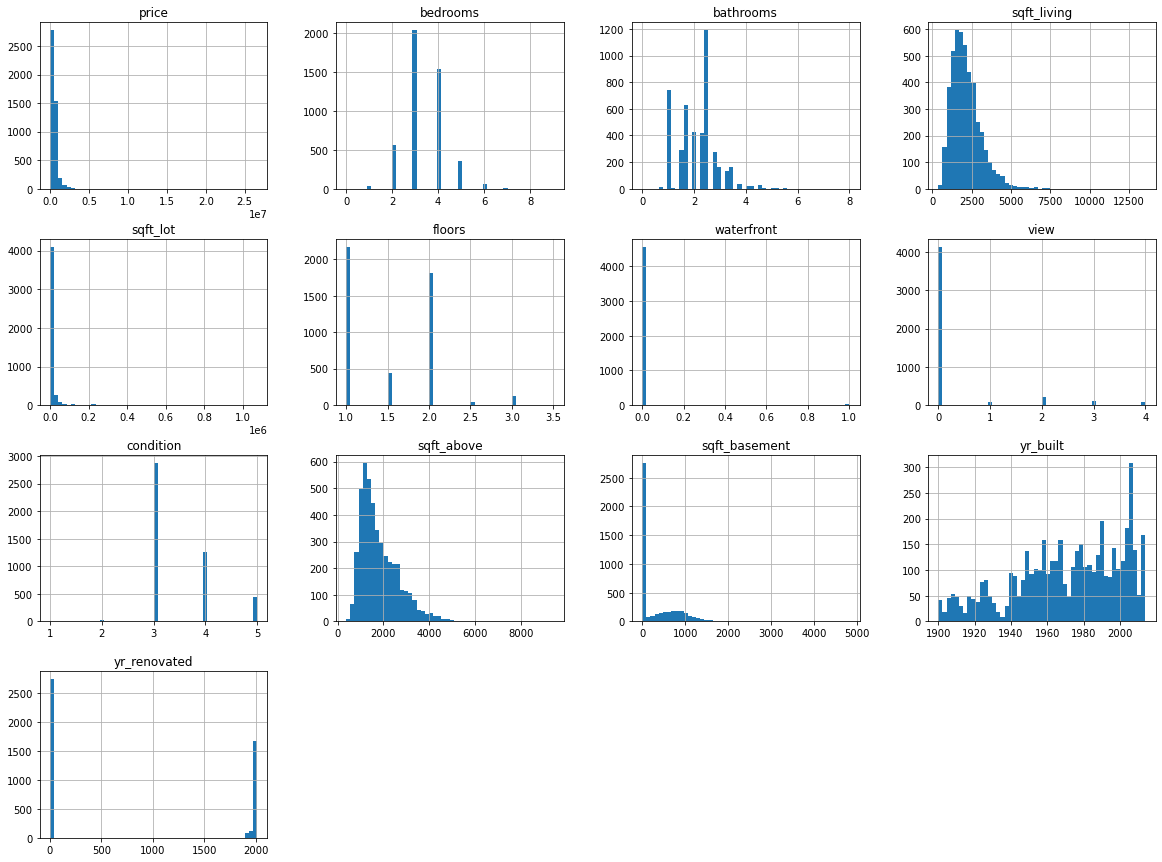

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

<h3>Visualizing data using seaborn</h3>

In [15]:
import seaborn as sns

%matplotlib inline

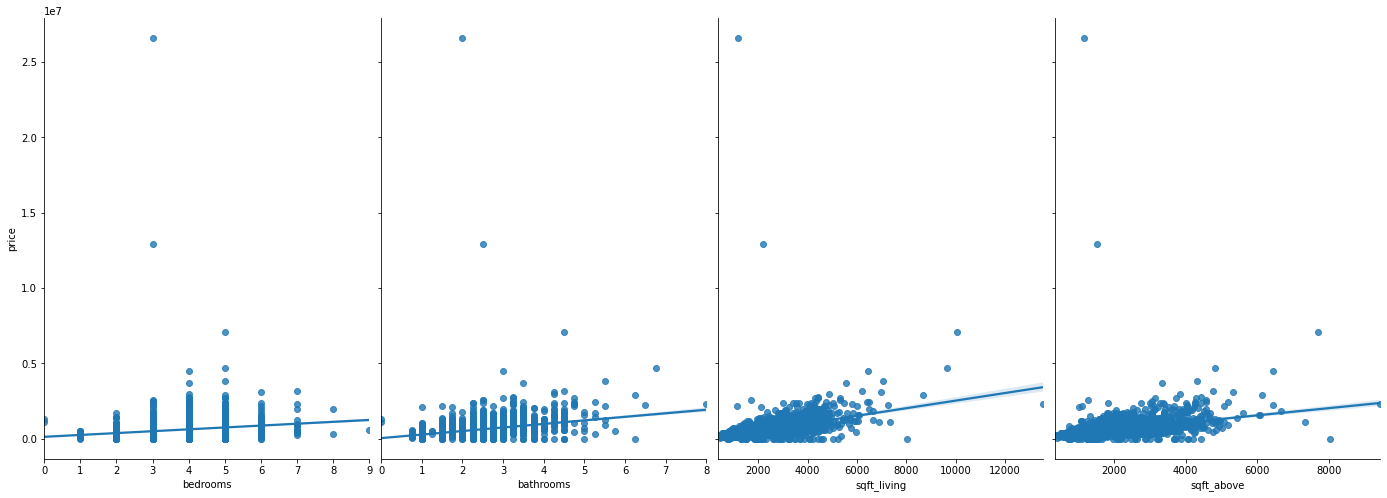

In [16]:
sns.pairplot(housing, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above'], y_vars='price', height=7, aspect=0.7, kind='reg')

<p>Lets look for some correlations</p>

In [17]:
# compute the standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr(method='pearson')

In [20]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

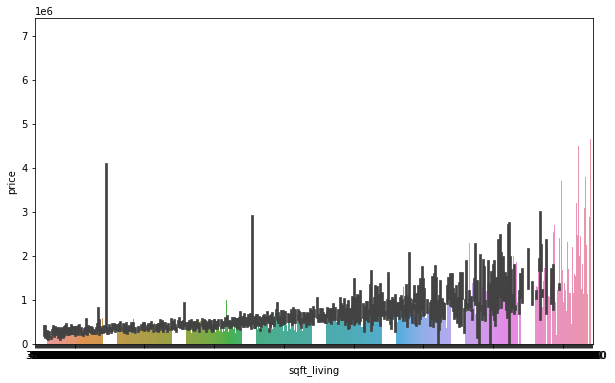

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.sqft_living, y=housing['price'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

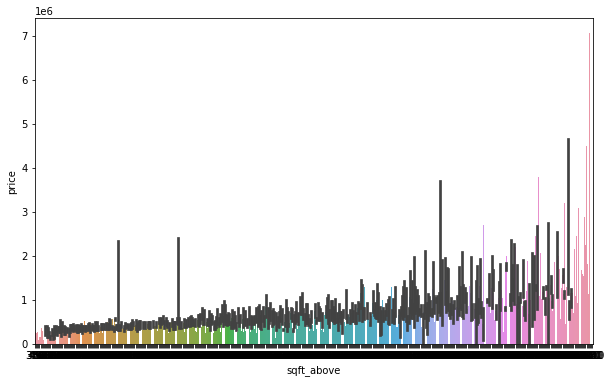

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.sqft_above, y=housing['price'])

<p>Looks like there is a correlation between prices and sqft_living, sqft_above, and bathrooms</p>
<p>Lets look deeper into those relationships</p>

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

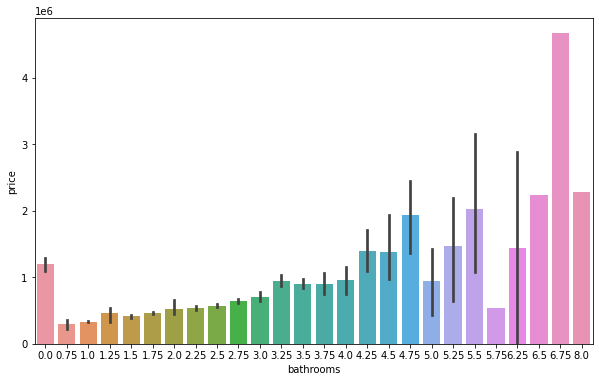

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.bathrooms, y=housing['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

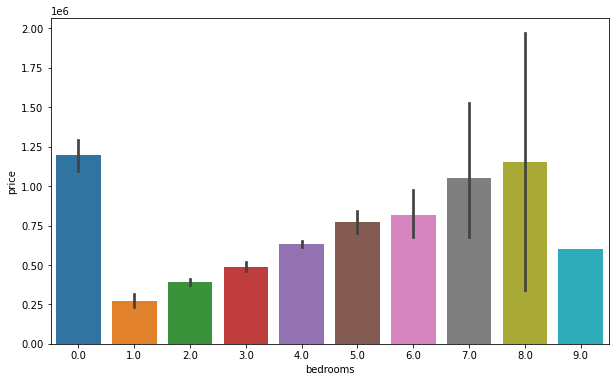

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=housing.bedrooms, y=housing['price'])

<p>There is some information here</p>
<p>There appears to be some houses without bathrooms. Also, a house with around 5 bathrooms sells for less than expected.</p>

In [31]:
# taking closer look at price breakdown for each bathroom group
bathroomgroup = housing.groupby(['bathrooms']).price.agg([len, min, max])
bathroomgroup

,len,min,max
bathrooms,,,
0.00,2.0,1095000.0,1295648.0
0.75,17.0,80000.0,562100.0
1.00,743.0,0.0,2110000.0
1.25,3.0,321950.0,545000.0
1.50,291.0,0.0,2199900.0
1.75,629.0,0.0,2100000.0
2.00,427.0,0.0,26590000.0
2.25,419.0,0.0,2400000.0
2.50,1189.0,0.0,12899000.0


<p>
There are housing with fractional bathrooms, which is werid.
Also, there is only one house with 8 bathrooms. Same goes for 6.5 and 6.75.
There are also two houses with no bathrooms.
</p>
<p>Lets take a look to see if there are fractional bedrooms</p>

In [33]:
# taking closer look at price breakdown for each bathroom group
bedroomgroup = housing.groupby(['bedrooms']).price.agg([len, min, max])
bedroomgroup

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


<p>There is only one house with 9 bedrooms.</p>
<p>There are also two houses with no bedrooms. The min for the row with 0 bedrooms is 1095000, which is the same value for the row we saw before with no bathrooms. We can assume those values are related to the same houses.</p>
<p>Another problem we have with our data is that there are a couple houses with a price of zero. We should look into that more</p>

In [37]:
# lets see how many houses with prices of 0.
housing_zero_prices = housing[housing.price==0]
len(housing_zero_prices)

49

In [ ]:
# look for outliers

<h2>Preparation for Machine Learning Algorithm</h2>

<h3>Data Cleaning</h3>

In [21]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<p>Removing date from data because it's irrelevant</p>

In [22]:
housing.drop(['date'], axis='columns', inplace = True)

In [23]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<h1>Learning</h1>